In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
#Generate data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = X + 2 * (X ** 2) -5 * (X ** 3) + np.random.randn(100, 1) * 5

In [3]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [4]:
#Store training & testing error
train_errors, test_errors = [], []

In [5]:
for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    #Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    #Evaluate the model
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    #Append the results
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

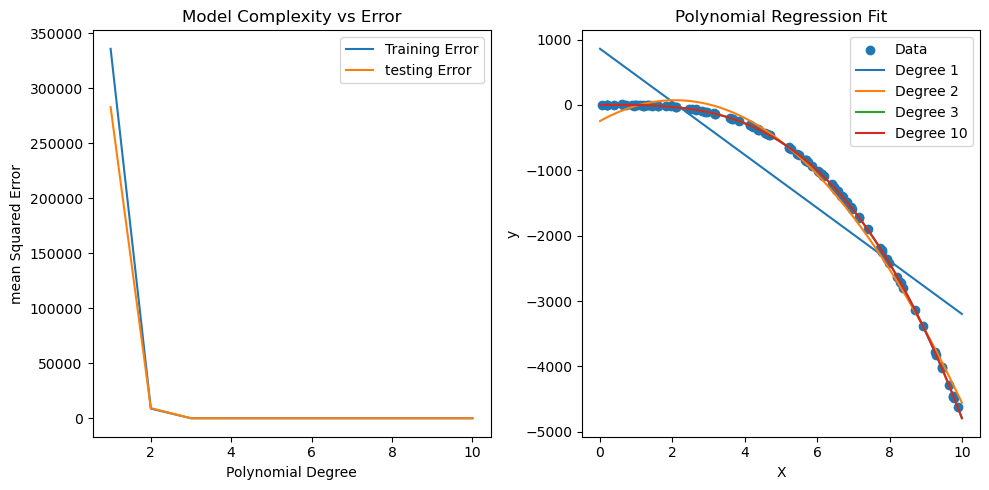

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1,11), train_errors, label='Training Error')
plt.plot(range(1,11), test_errors, label='testing Error')
plt.xlabel("Polynomial Degree")
plt.ylabel('mean Squared Error')
plt.title("Model Complexity vs Error")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X, y, label='Data')
X_range = np.linspace(0, 10, 100).reshape(-1,1)
for degree in [1,2,3,10]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_range)
    model = LinearRegression()
    model.fit(poly.transform(X), y)
    y_range_pred = model.predict(X_poly)
    plt.plot(X_range, y_range_pred, label = f'Degree {degree}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()


plt.tight_layout()
plt.show()